In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import re

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd.set_option('display.max_columns',None)

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

n_sample = df.shape[0]
n_feature = df.shape[1]

df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [4]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [5]:
df.drop("policy_id", axis=1, inplace=True)

In [6]:
df['torque'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=Nm)', x)[0])
df['rpm'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Convert the columns to numeric data type
df['torque'] = pd.to_numeric(df['torque'])
df['rpm'] = pd.to_numeric(df['rpm'])

# Calculate torque to RPM ratio 
df['torque to rpm ratio'] = df['torque'] / df['rpm']

df.drop(['max_torque', 'rpm', 'torque'], axis=1,inplace=True)

In [7]:
df['power'] = df['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=bhp)', x)[0])
df['rpm'] = df['max_power'].apply(lambda x: re.findall(r'\d+', x)[-1])

# Convert the columns to numeric data type
df['power'] = pd.to_numeric(df['power'])
df['rpm'] = pd.to_numeric(df['rpm'])

# Calculate power to RPM ratio
df['power to rpm ratio'] = df['power'] / df['rpm']


df.drop(['max_power', 'rpm', 'power'], axis=1,inplace=True)

In [8]:
for col in df.columns:
    print("values of " + col)
    print(df[col].unique())
    print()

values of policy_tenure
[0.51587359 0.67261851 0.84111026 ... 1.16227251 1.2363069  0.12442893]

values of age_of_car
[0.05 0.02 0.11 0.07 0.16 0.14 0.04 0.01 0.12 0.03 0.1  0.09 0.   0.08
 0.15 0.13 0.39 0.17 0.06 0.18 0.2  0.29 0.19 0.38 0.22 0.23 0.26 0.21
 0.27 0.28 0.3  0.25 0.31 0.33 0.35 0.32 0.24 0.37 1.   0.42 0.36 0.45
 0.49 0.46 0.34 0.82 0.44 0.62 0.81]

values of age_of_policyholder
[0.64423077 0.375      0.38461538 0.43269231 0.63461538 0.51923077
 0.40384615 0.42307692 0.29807692 0.44230769 0.59615385 0.48076923
 0.30769231 0.57692308 0.60576923 0.47115385 0.5        0.39423077
 0.61538462 0.31730769 0.32692308 0.49038462 0.46153846 0.92307692
 0.69230769 0.45192308 0.41346154 0.68269231 0.36538462 0.35576923
 0.50961538 0.53846154 0.67307692 0.34615385 0.54807692 0.28846154
 0.55769231 0.75961538 0.33653846 0.74038462 0.66346154 0.625
 0.52884615 0.58653846 0.65384615 0.73076923 0.56730769 0.70192308
 0.80769231 0.79807692 0.84615385 0.71153846 0.77884615 0.76923077
 0.

In [9]:
cat_features = df.select_dtypes(include=['object']).columns

print(cat_features)
print(f"Numbers of cat_features : {len(cat_features)}")


print()

label_features = [feat for feat in cat_features if df[feat].nunique() == 2]
print(label_features)
print(f"Numbers of label_features : {len(label_features)}")


print()


onehot_features = list(set(cat_features) - set(label_features))
print(onehot_features)
print(f"Numbers of onehot_features : {len(onehot_features)}")

print()

con_features = df.select_dtypes(include=['int', 'float']).columns

print(con_features)
print(f"Numbers of con_features : {len(con_features)}")


Index(['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')
Numbers of cat_features : 25



['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'transmission_type', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']
Numbers of label_features : 19

['area_cluster', 'model', 'steering_type', 'fuel_type', 'engine_type', 'segment']
Numbers of onehot_features : 6

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim', 'torque to rpm ratio',
       'power to rpm ratio'],
      dtype='object')
Numbers of con_features : 18


In [10]:
con_features = con_features.drop(["age_of_car", "age_of_policyholder", 'is_claim'])

In [11]:
standar = StandardScaler()

df[con_features] = pd.DataFrame(standar.fit_transform(df[con_features]), columns=con_features)

In [12]:
label_encoder = LabelEncoder()

for feat in label_features:
    df[feat] = label_encoder.fit_transform(df[feat])

In [13]:
df

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio,power to rpm ratio
0,-0.230283,0.05,0.644231,C1,-0.783513,-0.671712,A,M1,CNG,F8D Petrol Engine,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,Power,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112
1,0.148188,0.02,0.375000,C2,0.462975,-0.671712,A,M1,CNG,F8D Petrol Engine,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,Power,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112
2,0.555022,0.02,0.384615,C3,-0.835268,-0.671712,A,M1,CNG,F8D Petrol Engine,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,Power,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112
3,0.697883,0.11,0.432692,C4,0.158275,-0.671712,C1,M2,Petrol,1.2 L K12N Dualjet,-0.620458,1,1,0,1,1,1,0.130093,0.771357,0,-0.570334,Electric,-0.231926,0.464026,0.559973,-0.481470,-0.236684,1,0,0,1,1,1,1,1,1,1,1,1,0.172752,0,-0.541661,-0.170737
4,-0.035840,0.11,0.634615,C5,0.900969,0.207812,A,M3,Petrol,1.0 SCe,-0.620458,0,0,0,0,1,1,-0.613422,-1.296417,0,-0.570334,Electric,0.645040,-0.383610,-0.831789,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,0.172752,0,-0.672941,-0.480661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,-0.618508,0.13,0.644231,C8,-0.568111,0.207812,A,M3,Petrol,1.0 SCe,-0.620458,0,0,0,0,1,1,-0.613422,-1.296417,0,-0.570334,Electric,0.645040,-0.383610,-0.831789,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,0.172752,0,-0.672941,-0.480661
58588,1.420720,0.02,0.519231,C14,-0.625076,-0.671712,A,M1,CNG,F8D Petrol Engine,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,Power,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112
58589,1.330490,0.05,0.451923,C5,0.900969,-0.671712,A,M1,CNG,F8D Petrol Engine,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,Power,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112
58590,1.509251,0.14,0.557692,C8,-0.568111,-0.671712,B2,M6,Petrol,K Series Dual jet,-0.620458,0,1,0,1,0,1,0.130093,0.771357,1,-0.570334,Electric,-0.231926,-0.017585,0.559973,-0.293078,-0.236684,1,0,0,0,1,1,1,1,1,1,1,1,0.172752,0,-0.541661,-0.170737


In [14]:
df = pd.get_dummies(df, columns=onehot_features, drop_first=True)

In [15]:
df

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,torque to rpm ratio,power to rpm ratio,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,steering_type_Manual,steering_type_Power,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility
0,-0.230283,0.05,0.644231,-0.783513,-0.671712,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.148188,0.02,0.375000,0.462975,-0.671712,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.555022,0.02,0.384615,-0.835268,-0.671712,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.697883,0.11,0.432692,0.158275,-0.671712,-0.620458,1,1,0,1,1,1,0.130093,0.771357,0,-0.570334,-0.231926,0.464026,0.559973,-0.481470,-0.236684,1,0,0,1,1,1,1,1,1,1,1,1,0.172752,0,-0.541661,-0.170737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.035840,0.11,0.634615,0.900969,0.207812,-0.620458,0,0,0,0,1,1,-0.613422,-1.296417,0,-0.570334,0.645040,-0.383610,-0.831789,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,0.172752,0,-0.672941,-0.480661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,-0.618508,0.13,0.644231,-0.568111,0.207812,-0.620458,0,0,0,0,1,1,-0.613422,-1.296417,0,-0.570334,0.645040,-0.383610,-0.831789,-0.795455,-1.084057,0,0,0,0,0,1,1,1,0,1,1,1,0.172752,0,-0.672941,-0.480661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58588,1.420720,0.02,0.519231,-0.625076,-0.671712,-0.620458,0,0,0,1,0,1,-1.375713,-1.296417,1,-0.570334,-1.108893,-1.301882,-1.402768,-0.983846,-0.942828,0,0,0,0,0,0,0,1,0,0,0,1,-1.266548,0,-0.804185,-1.143112,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
58589,1.330490,0.05,0.451923,0.900969,-0.671712,-0.620458,0,0,0,1,0,1,-1.375713,-1.29641

### Pie chart 

In [16]:
df["is_claim"].value_counts()/df["is_claim"].count()

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

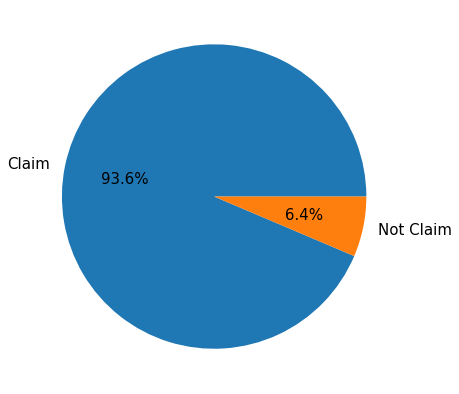

In [17]:
#plot pie chart in is_claim

plt.figure(figsize=(10, 7))
plt.pie(df["is_claim"].value_counts()/df["is_claim"].count(),
        labels=["Claim", "Not Claim"],
        textprops={"size" : 15},
        autopct="%.1f%%")

plt.show()

In [18]:
df["is_claim"].value_counts()/df["is_claim"].count()

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

In [19]:
import model

In [20]:
lr = model.linearclassifier()

X = df.drop("is_claim", axis=1).values
y = df["is_claim"]


lr.fit(X, y)

Epoch[1/1000], Loss : 0.6931471805599452
Epoch[2/1000], Loss : 0.6931471805599452
Epoch[3/1000], Loss : 0.6931471805599452
Epoch[4/1000], Loss : 0.6931471805599452
Epoch[5/1000], Loss : 0.6931471805599452
Epoch[6/1000], Loss : 0.6931471805599452
Epoch[7/1000], Loss : 0.6931471805599452
Epoch[8/1000], Loss : 0.6931471805599452
Epoch[9/1000], Loss : 0.6931471805599452
Epoch[10/1000], Loss : 0.6931471805599452
Epoch[11/1000], Loss : 0.6931471805599452
Epoch[12/1000], Loss : 0.6931471805599452
Epoch[13/1000], Loss : 0.6931471805599452
Epoch[14/1000], Loss : 0.6931471805599452
Epoch[15/1000], Loss : 0.6931471805599452
Epoch[16/1000], Loss : 0.6931471805599452
Epoch[17/1000], Loss : 0.6931471805599452
Epoch[18/1000], Loss : 0.6931471805599452
Epoch[19/1000], Loss : 0.6931471805599452
Epoch[20/1000], Loss : 0.6931471805599452
Epoch[21/1000], Loss : 0.6931471805599452
Epoch[22/1000], Loss : 0.6931471805599452
Epoch[23/1000], Loss : 0.6931471805599452
Epoch[24/1000], Loss : 0.6931471805599452
E